In [11]:
# 📦 导入依赖
import ROOT
import uproot
import numpy as np
import awkward as ak
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from scipy.stats import gamma as gamma_dist
from scipy.stats import lognorm as log_normal_dist
from scipy.stats import norm as gaussian_dist
from scipy.stats import binned_statistic
from scipy.optimize import curve_fit
from scipy.special import lambertw
import pandas as pd
import pickle
import os
plot_dir = "/home/llr/ilc/shi/code/Energy-Reco/Figures"
plot_conf = "CellSize"
plt.style.use('/home/llr/ilc/shi/code/Plot_style/cepc.mplstyle')
fig_size = (8, 6)
colors = plt.get_cmap('tab10').colors

In [12]:
def ConstructHists(E_reco,Nbins=50):
    mean = np.mean(E_reco)
    rms = np.std(E_reco)
    mask = (E_reco >= mean - 5*rms) & (E_reco <= mean + 5*rms)
    filtered_data = E_reco[mask]
    counts, bin_edges = np.histogram(filtered_data, bins=Nbins)
    return counts, bin_edges
# 打开 ROOT 文件，载入 events tree
MIP_table={# Si thickness (mm) : MIP (MeV)
    0.15:0.0410,
    0.3:0.0861,
    0.45:0.1328,
    0.6:0.1803,
    0.75:0.2282
}


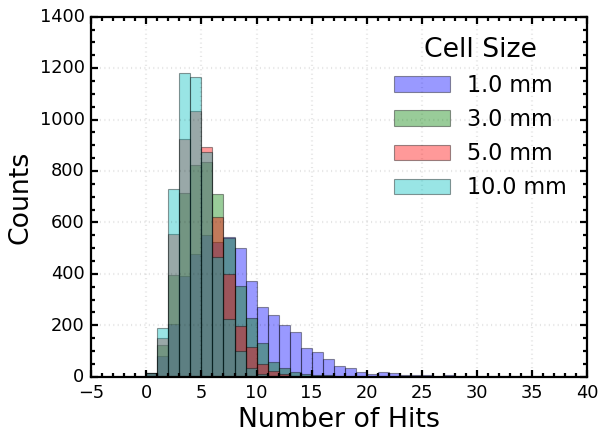

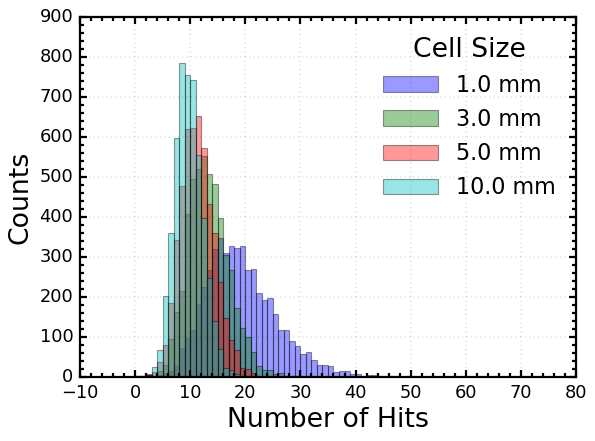

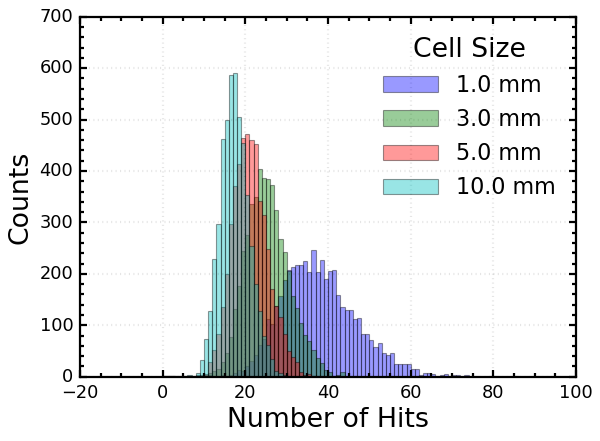

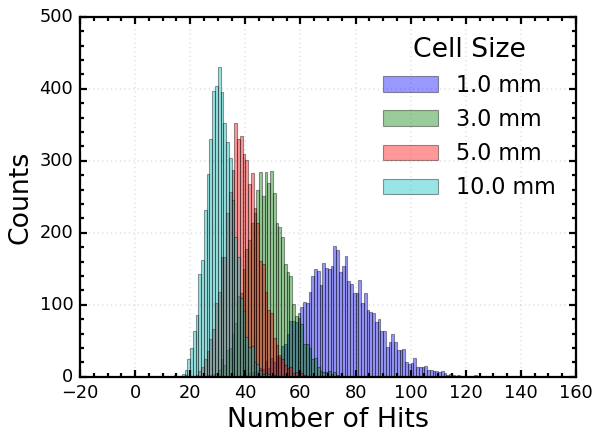

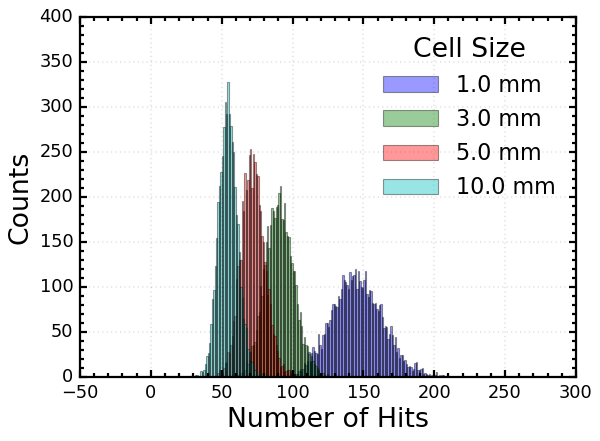

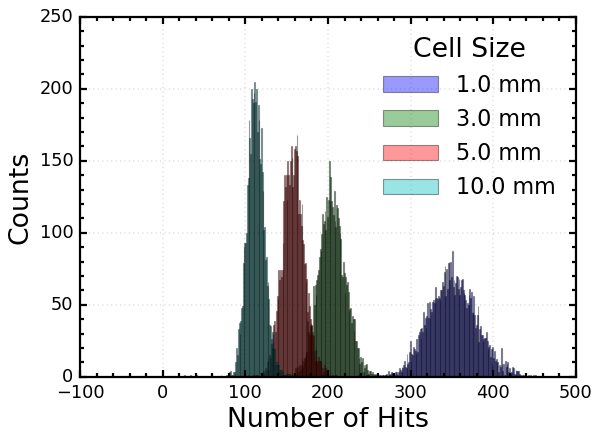

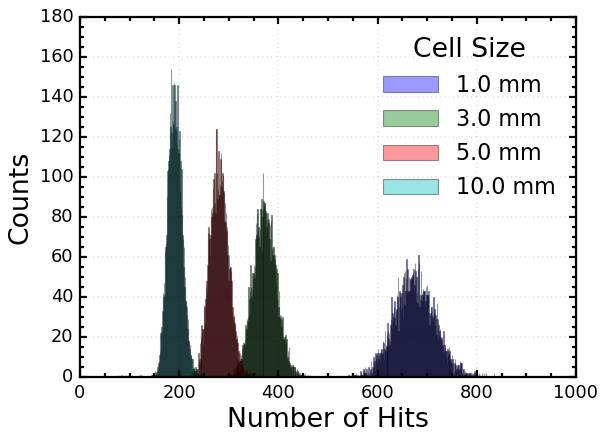

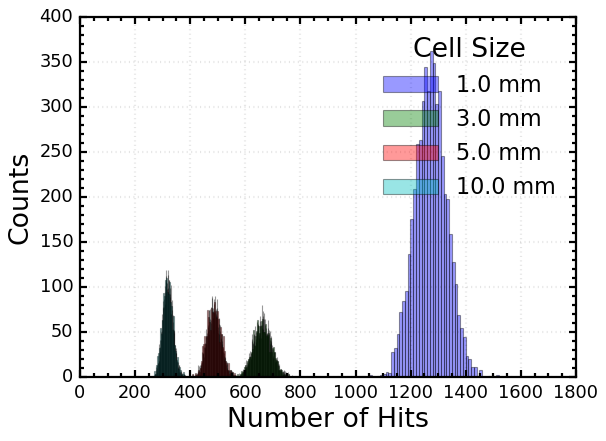

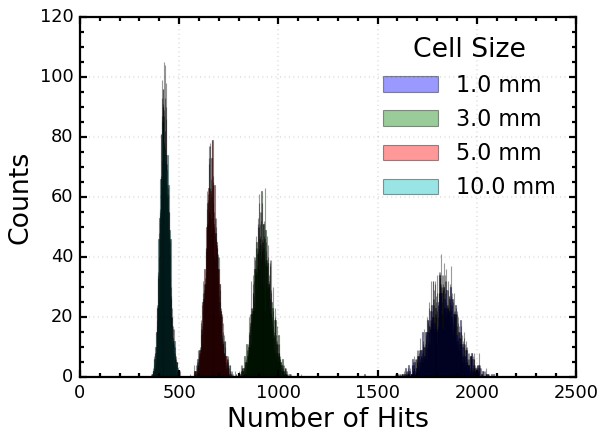

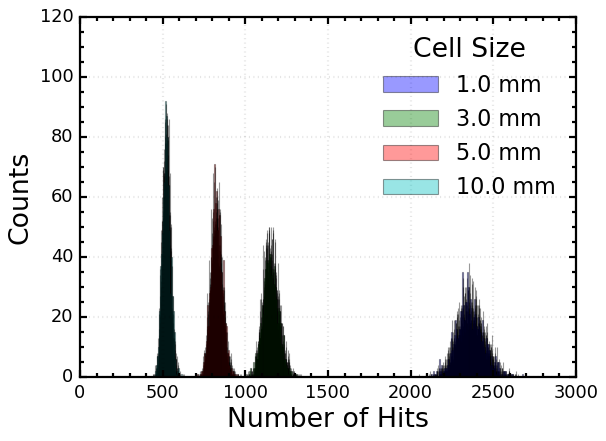

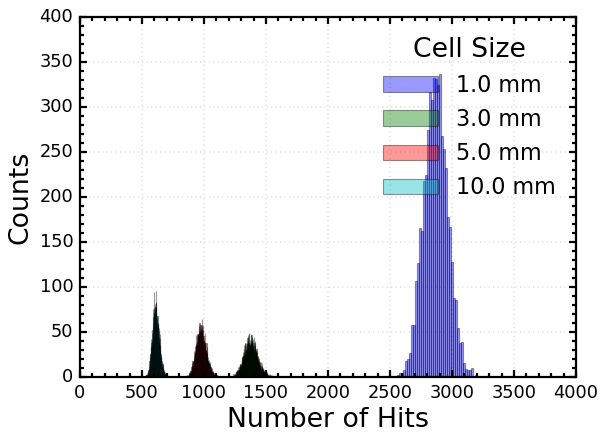

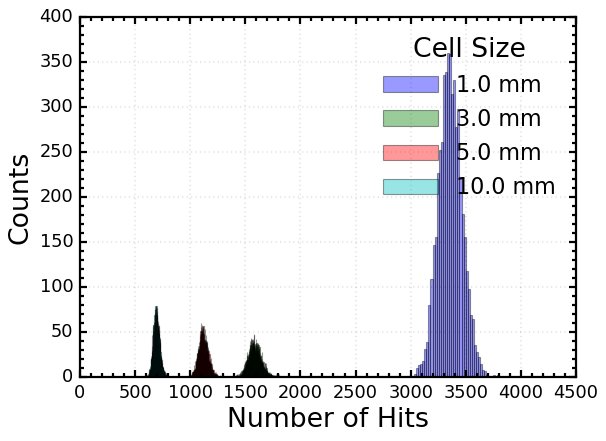

In [13]:
Threshold_i = 0.1
Si = 0.75  # mm
SamplingLayer = 30
ECAL_layers = 120
CellSizes = (1.0, 3.0, 5.0, 10.0)  # mm
Threshold = Threshold_i * MIP_table[Si]
ParticleEnergy = (0.1, 0.25, 0.5, 1.0, 2.0, 5.0, 10.0, 20.0, 30.0, 40.0, 50.0, 60.0)

CONF = "NHits"

# 预加载所有 cellsize 的 hist 数据
hist_dict = {}
for CS in CellSizes:
    DataPath = (
        f"/home/llr/ilc/shi/data/SiWECAL-Prototype/"
        f"Simu2025-06/CONF3/gamma/Validate/"
        f"Merged_X{CS:.1f}mm_Y{CS:.1f}mm_Si{Si:.2f}mm_layer{SamplingLayer}_in{ECAL_layers}"
    )
    hist_dict[CS] = pickle.load(open(f"{DataPath}/Hist/{CONF}_Hists.pkl", "rb"))


# ---------- 绘图：同一能量、不同 cellsize ----------
for i, E in enumerate(ParticleEnergy):
    plt.figure(figsize=fig_size)

    for i_cell,CS in  enumerate(CellSizes):
        hist = hist_dict[CS][i]

        counts = hist['counts']
        bin_edges = hist['bin_edges']
        bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2

        # 找峰值
        peak_index = np.argmax(counts)
        peak_x = bin_centers[peak_index]

        # 缩放到 E
        #scale = E / peak_x if peak_x != 0 else 1.0
        scale =1
        bin_centers_scaled = bin_centers * scale

        plt.bar(
            bin_centers_scaled,
            counts,
            width=(bin_edges[1] - bin_edges[0]) * scale,
            alpha=0.4,
            label=f'{CS} mm',
            align='center',
        )

    #plt.xlabel(r'$E_{\rm reco}$ (GeV)')
    plt.xlabel('Number of Hits')
    plt.ylabel('Counts')
    #plt.title(rf'{E} GeV photons')
    plt.legend(loc='upper right',title='Cell Size',title_fontsize=24)
    plt.grid(True)
    if i == 0:
        plt.savefig(f"{plot_dir}/Hist_{plot_conf}.pdf", dpi=300, bbox_inches='tight')
    plt.show()
